# calculo de P para ponto de bolha e orvalho dado z e T

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

* para T = 298 K

In [2]:
#pressao de saturação do componente 1
PsatA=1e5 #Pa
#pressao de saturação do  componente 2
PsatB=20e5 #Pa
#vetor de pressao de saturação de cada componente
Psat=[PsatA,PsatB]

In [3]:
#modelo de margules
def func_vetor_lngamma(vetor_x):
    xA=vetor_x[0]
    xB=vetor_x[1]
    gammaA=A*xB**2
    gammaB=A*xA**2
    vetor_gamma=[gammaA,gammaB]
    return vetor_gamma

In [4]:
#Parametro do modelo dado
A=-.1

In [5]:
vx_test=[.0,1.]
vlngamma_test = func_vetor_lngamma(vx_test)
vgamma_test=np.exp(vlngamma_test)
print(vgamma_test)
print('fraçaõ molar do componente B tende a 1, gamma dele tende a 1')

vx_test=[1.,.0]
vlngamma_test = func_vetor_lngamma(vx_test)
vgamma_test=np.exp(vlngamma_test)
print(vgamma_test)
print('fraçaõ molar do componente A tende a 1, gamma dele tende a 1')

vx_test=[.2,.8]
vlngamma_test = func_vetor_lngamma(vx_test)
vgamma_test=np.exp(vlngamma_test)
print(vgamma_test)
print('teste com uma composição arbitrária')

[ 0.90483742  1.        ]
fraçaõ molar do componente B tende a 1, gamma dele tende a 1
[ 1.          0.90483742]
fraçaõ molar do componente A tende a 1, gamma dele tende a 1
[ 0.938005    0.99600799]
teste com uma composição arbitrária


In [6]:
#calculo de pressao de bolha (explicito)
def func_Pbolha(vetor_z):
    vetor_x=vetor_z
    vetor_lngamma=func_vetor_lngamma(vetor_x)
    xA=vetor_x[0]
    xB=vetor_x[1]
    gammaA=np.exp(vetor_lngamma[0])
    gammaB=np.exp(vetor_lngamma[1])
    PsatA=Psat[0]
    PsatB=Psat[1]
    P=xA*gammaA*PsatA+xB*gammaB*PsatB
    yA=xA*gammaA*PsatA/P
    yB=xB*gammaB*PsatB/P
    vetor_y=[yA,yB]
    return P, vetor_y

In [7]:
vx_test=[.0,1.]
resposta_pbolha_test = func_Pbolha(vx_test)
print(resposta_pbolha_test)
print('fraçaõ molar do componente B tende a 1, a Pbolha é igual ao Psat do B, o y é igual ao x')

vx_test=[1.,.0]
resposta_pbolha_test = func_Pbolha(vx_test)
print(resposta_pbolha_test)
print('fraçaõ molar do componente A tende a 1, a Pbolha é igual ao Psat do A, o y é igual ao x')

vx_test=[.2,.8]
resposta_pbolha_test = func_Pbolha(vx_test)
print(resposta_pbolha_test)
print('teste com uma composição arbitrária, pressão intermediária se não houver azeotropo, ou maior ou menor se houver, y mais rico no leve (maior psat)')

(2000000.0, [0.0, 1.0])
fraçaõ molar do componente B tende a 1, a Pbolha é igual ao Psat do B, o y é igual ao x
(100000.0, [1.0, 0.0])
fraçaõ molar do componente A tende a 1, a Pbolha é igual ao Psat do A, o y é igual ao x
(1612372.8829410013, [0.011635087757365272, 0.98836491224263467])
teste com uma composição arbitrária, pressão intermediária se não houver azeotropo, ou maior ou menor se houver, y mais rico no leve (maior psat)


In [8]:
#fazer um gráfico
vetor_xA = np.linspace(0,1,100) #vetor_fracoes_molares_de_A_em_fase_liquida
vetor_xB = 1.-vetor_xA

vetor_yA = np.zeros(100)
vetor_yB = np.zeros(100)
vetor_P = np.zeros(100)

for i in range(100):
    vetor_P[i],[vetor_yA[i],vetor_yB[i]] = func_Pbolha([vetor_xA[i],vetor_xB[i]])

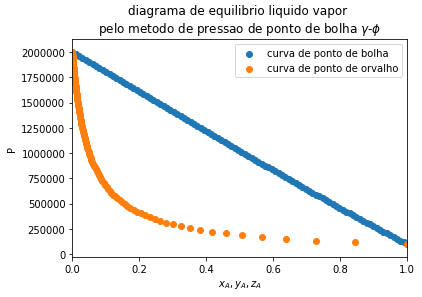

In [9]:
plt.title('diagrama de equilibrio liquido vapor \n'r'pelo metodo de pressao de ponto de bolha $\gamma$-$\phi$')
plt.scatter(vetor_xA,vetor_P,label='curva de ponto de bolha')
plt.scatter(vetor_yA,vetor_P,label='curva de ponto de orvalho')
plt.ylabel('P')
plt.xlabel(r'$x_A,y_A,z_A$')
plt.legend()
plt.xlim(0,1)
plt.show()

> Ao rodar o metodo de calculo de ponto de bolha para varios valores de composição da fase liquida obtemos a curva de ponto de orvalho inteira também

In [14]:
#calculo de pressao de bolha (explicito)
def func_Porvalho(vetor_z):
    
    #PONTO DE ORVALHO, A COMPOSIÇÃO DO VAPOR É IGUAL A GLOBAL
    vetor_y=vetor_z
    yA=vetor_y[0]
    yB=vetor_y[1]
    
    #DEFINIR ESTIMATIVA INICIAL BASEADA NO CASO DE MISTURA IDEAL
    estimativa_vetor_gamma = [1.,1.]
    gammaA=estimativa_vetor_gamma[0]
    gammaB=estimativa_vetor_gamma[1]
    
    #PRESSOES DE SATURAÇÃO DOS PUROS
    PsatA=Psat[0]
    PsatB=Psat[1]
    
    #NUMERO MAXIMO DE ITERACOES
    imax=100
    #TOLERANCIA DE CONVERGENCIA
    tol=1e-9
    #DEFINIR VARIAVEL RESIDUO COM VALOR INICIAL MAIOR QUE A TOLERANCIA
    res=1.
    
    
    #INICIO DO METODO ITERATIVO
    while(res>tol and i<imax):
        
        #TODA ESSA PARTE COM IDENTAÇÃO ABAIXO DO BLOCK WHILE VAI SER EXECUTADA VÁRIAS VEZES
        #ATÉ QUE SE SATISFAÇA O CRITÉRIO DE CONVERGENCIA RESIDUO<TOLERANCIA
        #OU QUE ULTRAPASSE O LIMITE DE ITERAÇÕES I>IMAX
        
        #SALVAR A ESTIMATIVA INICIAL OU RESULTADO DA ITERAÇÃO ANTERIOR NAS VARIAVEIS _ANTIGO PARA FAZER A ANALISE DO RESIDUO
        gammaA_antigo = gammaA
        gammaB_antigo = gammaB

        #EQUACAO DO PONTO DE ORVALHO PARA EQUILIBRIO BIFASICO DE SUBSTANCIAS MISCIVEIS
        #SUPOE O GAMMA CONHECIDO
        P = 1. / ( yA/(gammaA*PsatA) + yB/(gammaB*PsatB) )

        #CALCULO DA COMPOSICAO DA FASE LIQUIDA A PARTIR DESSA PRESSAO
        xA= yA*P/(gammaA*PsatA)
        xB= yB*P/(gammaB*PsatB)
        vetor_x=[xA,xB]

        #CALCULO RIGOROSO DOS COEFICIENTES DE ATIVIDADE A PARTIR DO MODELO DE GIBBS DE EXCESSO
        vetor_lngamma=func_vetor_lngamma(vetor_x)
        gammaA=np.exp(vetor_lngamma[0])
        gammaB=np.exp(vetor_lngamma[1])

        #CALCULO DO RESIDUO DEFINIDO PELA VARIAÇAO NO VALOR DE GAMMA DE UMA ITERACAO PARA A OUTRA
        #ABS É A FUNÇÃO MÓDULO
        res= abs(gammaA_antigo - gammaA) + abs(gammaB_antigo - gammaB)
        
        #FIM DO BLOCO ITERATIVO, VOLTAR PARA A LINHA DO WHILE ATÉ CONVERGIR
    
    #APÓS CONVERGIR, RETORNAR OS RESULTADOS    
    return P, vetor_x

In [15]:
vy_test=[.0,1.]
resposta_porvalho_test = func_Porvalho(vy_test)
print(resposta_porvalho_test)
print('fraçaõ molar do componente B tende a 1, a Porvalho é igual ao Psat do B, o x é igual ao y')

vy_test=[.2,.8]
resposta_porvalho_test = func_Porvalho(vy_test)
print(resposta_porvalho_test)
print('teste composição arbitrária')

(2000000.0, [0.0, 1.0])
fraçaõ molar do componente B tende a 1, a Porvalho é igual ao Psat do B, o x é igual ao y
(410794.51584696426, [0.82413404448777783, 0.17586595551222223])
teste composição arbitrária


In [16]:
#fazer um gráfico
vetor_yA = np.linspace(0,1,100) #vetor_fracoes_molares_de_A_em_fase_liquida
vetor_yB = 1.-vetor_yA

vetor_xA = np.zeros(100)
vetor_xB = np.zeros(100)
vetor_P = np.zeros(100)

for i in range(100):
    vetor_P[i],[vetor_xA[i],vetor_xB[i]] = func_Porvalho([vetor_yA[i],vetor_yB[i]])

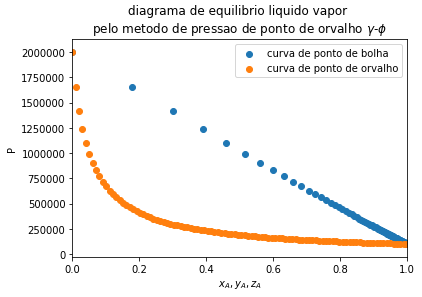

In [17]:
plt.title('diagrama de equilibrio liquido vapor \n'r'pelo metodo de pressao de ponto de orvalho $\gamma$-$\phi$')
plt.scatter(vetor_xA,vetor_P,label='curva de ponto de bolha')
plt.scatter(vetor_yA,vetor_P,label='curva de ponto de orvalho')
plt.ylabel('P')
plt.xlabel(r'$x_A,y_A,z_A$')
plt.legend()
plt.xlim(0,1)
plt.show()